In [1]:
# get the environment
import sys
print(sys.version)
print(sys.executable)
import os
os.getcwd()

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
C:\ProgramData\Anaconda3\python.exe


'C:\\Users\\bbutler\\BButlerStuff\\PLoan'

In [2]:
# import base libraries
from IPython.core.display import display, HTML
from dateutil import relativedelta
import pandas as pd
import numpy as np

import re
import statistics as stat
import datetime as dt
from datetime import timedelta

from dateutil.relativedelta import relativedelta

# additional imports for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline

# set options
# display(HTML("<style>.container {width:90% !important;} </style>"))
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.4f}'.format

# Purpose:
The purpose of this file is to make a clean pipeline to merger PLoan Data into a single format for valuation

# Step 1 : Set the directory  to get the files, load the terms and the app data

In [3]:
# os.chdir('C:\\Users\\bbutler\\Documents\\PLoan\\CRIF_210301')

os.chdir('C:\\Users\\bbutler\\BButlerStuff\\PLoan\\PortSep2021')

In [4]:
terms = pd.read_csv('Eastern_AppAdditionalDetailsV2.csv', low_memory=False)
terms.head()

,AppID,AppDetailSavePointID,ProductID,CreationDate,AutoDebitFromEB,AutoPayAcctNum,AutoPayRoutingNum,AccountNumber,IntRate,BaseIntRate,Term,CheckingAcctType,PremierCustInd,OrigDTI,PotentialProductDebtToIncome,TotalScore,LoanToValue
0,2001,0,111,8/16/2017 6:42:49 PM,No,NaN,nan,NaN,0.0000,nan,nan,NaN,No,0.4000,0.7250,nan,0.0000
1,2001,0,112,8/16/2017 6:29:50 PM,No,NaN,nan,NaN,4.7500,nan,240.0000,NaN,No,0.4000,0.4000,nan,0.0000
2,2002,0,107,8/18/2017 2:48:16 PM,No,NaN,nan,NaN,0.0000,nan,nan,NaN,No,0.0000,0.0000,nan,0.0000
3,2002,0,117,8/28/2017 12:43:40 PM,No,NaN,nan,NaN,0.0000,nan,nan,NaN,No,0.0000,0.0000,nan,0.0000
4,2003,0,111,8/18/2017 4:11:37 PM,Yes,123456789,nan,NaN,3.7500,nan,nan,Eastern Bank Checking Account,No,0.5058,0.5058,696.0000,5.9341


In [5]:
# get a sampple

test = terms[terms['AppID'] == 2017]
test

,AppID,AppDetailSavePointID,ProductID,CreationDate,AutoDebitFromEB,AutoPayAcctNum,AutoPayRoutingNum,AccountNumber,IntRate,BaseIntRate,Term,CheckingAcctType,PremierCustInd,OrigDTI,PotentialProductDebtToIncome,TotalScore,LoanToValue
23,2017,0,117,8/25/2017 10:37:02 PM,No,406510976,nan,NaN,9.9900,10.0000,48.0000,Eastern Bank Checking Account,No,0.2182,0.2821,638.0000,0.0000


In [6]:
terms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90840 entries, 0 to 90839
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AppID                         90840 non-null  int64  
 1   AppDetailSavePointID          90840 non-null  int64  
 2   ProductID                     90840 non-null  int64  
 3   CreationDate                  90840 non-null  object 
 4   AutoDebitFromEB               90840 non-null  object 
 5   AutoPayAcctNum                60045 non-null  object 
 6   AutoPayRoutingNum             41308 non-null  float64
 7   AccountNumber                 39518 non-null  object 
 8   IntRate                       90812 non-null  float64
 9   BaseIntRate                   50768 non-null  float64
 10  Term                          62645 non-null  float64
 11  CheckingAcctType              52605 non-null  object 
 12  PremierCustInd                90840 non-null  object 
 13  O

In [7]:
loans = pd.read_csv('Eastern_ConsumerLoanApps.csv', low_memory=False)
loans.head()

,AppEntryCompletedDate,Textbox26,CustomerNumber,taxIDnum,appid,product,testfield,Score,FinancedAmt,contractAmt,InitialDecision,InitialUnderwriter,InitialDecisionDate,LastDecision,LastDecisionDate,ApplicationDaystoDecision,closeddate,ContractDate,SentToDecision,Textbox40,DisbursementDate,rescissiondate,BookedDate,ContracttoBooked,BookedYN,Aordereddate,Aduedate,Areceiveddate,tordereddate,tduedate,treceiveddate,fordereddate,fduedate,freceiveddate,FloodZone,Notes,CloseDatetoQCQueue,OriginationChannel,OriginationChannelCode,DistributionChannel,DistributionChannelCode,LoanOfficer,Underwriter,Processor,qcuser,OnlineSource
0,08/24/2017,,NaN,nan,2006,Flex Equity Line of Credit,NaN,nan,nan,nan,Cancelled,Janey Beauregard,9/8/2017 1:37:01 PM,Cancelled,9/8/2017 1:37 PM,nan,NaN,08/24/2017,NaN,nan,NaN,NaN,NaN,nan,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Product ""FlexLine"" was cancelled."" - jbeaurega...",nan,Ryal Side,317,Ryal Side,317.0000,Jean Carlucci,Janey Beauregard,NaN,,NaN
1,08/25/2017,MILTON RAMIREZ,00002223884,825544177.0000,2017,Personal Loan,NaN,638.0000,10000.0000,10000.0000,Declined,Risk Manager,8/28/2017 10:30:33 AM,Declined,8/28/2017 10:30 AM,0.0000,NaN,08/24/2017,8/28/2017 3:30 PM,0.0000,NaN,NaN,NaN,nan,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA Notice printed and sent - pmoffett - Sep ...,nan,Highlander,334,Highlander,334.0000,Ana Disla,Risk Manager,NaN,,NaN
2,08/28/2017,,NaN,nan,2024,Starter Personal Loan,NaN,nan,nan,nan,Cancelled,Janey Beauregard,9/5/2017 9:24:41 AM,Cancelled,9/5/2017 9:24 AM,nan,NaN,08/28/2017,NaN,nan,NaN,NaN,NaN,nan,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Product ""PersStart"" was cancelled."" - jbeaureg...",nan,Highlander,334,Highlander,334.0000,Ana Disla,Janey Beauregard,NaN,,NaN
3,08/30/2017,RICHARD NEENAN,00000130986,14326503.0000,2031,Flex Equity Line of Credit,3750000235,836.0000,40000.0000,40000.0000,Approved,Danielle Foster,9/12/2017 11:26:27 AM,Approved,9/12/2017 11:26 AM,11.0000,9/27/2017,09/27/2017,9/1/2017 7:53 PM,-10.0000,10/3/2017,10/2/2017 12:00 AM,10/18/2017 3:11 PM,0.0000,Yes,9/12/2017,9/12/2017,9/15/2017,9/12/2017,9/12/2017,9/22/2017,9/12/2017,9/12/2017,9/14/2017,X,"Loan has been closed and sent to QC, Original ...",14.0000,Lynnfells,315,Lynnfells,315.0000,Ryan Rothwell,Danielle Foster,NaN,Elena Vasi,NaN
4,09/02/2017,Ronald Melanson,NaN,18367633.0000,2042,Personal Loan,NaN,nan,nan,nan,Incomplete,Peter Moffett,10/12/2017 1:38:19 PM,Withdrawn,10/16/2017 8:31 AM,nan,NaN,09/02/2017,NaN,nan,NaN,NaN,NaN,nan,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Please enter requested amount, complete checkl...",nan,Lynnfells,315,Lynnfells,315.0000,Leslie Abad,Peter Moffett,NaN,,NaN


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73072 entries, 0 to 73071
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AppEntryCompletedDate      73072 non-null  object 
 1   Textbox26                  73072 non-null  object 
 2   CustomerNumber             61763 non-null  object 
 3   taxIDnum                   71411 non-null  float64
 4   appid                      73072 non-null  int64  
 5   product                    73072 non-null  object 
 6   testfield                  28470 non-null  object 
 7   Score                      61059 non-null  float64
 8   FinancedAmt                69829 non-null  float64
 9   contractAmt                69817 non-null  float64
 10  InitialDecision            73072 non-null  object 
 11  InitialUnderwriter         72919 non-null  object 
 12  InitialDecisionDate        73072 non-null  object 
 13  LastDecision               73072 non-null  obj

# Step 2: Get key fields from loans and terms to do join for NPV Calc

In [9]:
keyData = terms[['AppID', 'IntRate', 'Term', 'OrigDTI', 'PotentialProductDebtToIncome', 'TotalScore', 'AccountNumber','ProductID']]

# filter on personal loans only
keyData = keyData[keyData['ProductID'] == 117]

# drop na on account number

keyData = keyData[keyData['AccountNumber'].notna()]

keyData.head()

,AppID,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,TotalScore,AccountNumber,ProductID
33,2027,9.4900,60.0000,0.3203,0.3984,659.0000,3750000223,117
52,2041,9.4900,60.0000,0.3274,0.3411,728.0000,3750000215,117
54,2043,8.9900,48.0000,0.3448,0.3448,709.0000,3750000214,117
57,2046,9.4900,60.0000,0.2267,0.2727,685.0000,3750000219,117
86,2069,9.4900,60.0000,0.1845,0.2029,734.0000,3750000233,117


In [10]:
keyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 33 to 90808
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AppID                         7398 non-null   int64  
 1   IntRate                       7398 non-null   float64
 2   Term                          7398 non-null   float64
 3   OrigDTI                       7398 non-null   float64
 4   PotentialProductDebtToIncome  7398 non-null   float64
 5   TotalScore                    7316 non-null   float64
 6   AccountNumber                 7398 non-null   object 
 7   ProductID                     7398 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 520.2+ KB


In [11]:
# make date 
loans['AppEntryCompletedDate'] = pd.to_datetime(loans['AppEntryCompletedDate'], format = '%m/%d/%Y')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73072 entries, 0 to 73071
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AppEntryCompletedDate      73072 non-null  datetime64[ns]
 1   Textbox26                  73072 non-null  object        
 2   CustomerNumber             61763 non-null  object        
 3   taxIDnum                   71411 non-null  float64       
 4   appid                      73072 non-null  int64         
 5   product                    73072 non-null  object        
 6   testfield                  28470 non-null  object        
 7   Score                      61059 non-null  float64       
 8   FinancedAmt                69829 non-null  float64       
 9   contractAmt                69817 non-null  float64       
 10  InitialDecision            73072 non-null  object        
 11  InitialUnderwriter         72919 non-null  object        
 12  Init

In [12]:
loans['AppEntryCompletedDate'].isna().sum()

0

In [13]:
loans['AppEntryCompletedDate'].max()

Timestamp('2021-09-27 00:00:00')

In [14]:
# get a subset of fields to do the join

loansRed = loans[['AppEntryCompletedDate', 'appid', 'CustomerNumber', 'contractAmt', 'product', 'BookedYN', 'Score', 'LastDecision']]
loansRed.head()

,AppEntryCompletedDate,appid,CustomerNumber,contractAmt,product,BookedYN,Score,LastDecision
0,2017-08-24,2006,NaN,nan,Flex Equity Line of Credit,No,nan,Cancelled
1,2017-08-25,2017,00002223884,10000.0000,Personal Loan,No,638.0000,Declined
2,2017-08-28,2024,NaN,nan,Starter Personal Loan,No,nan,Cancelled
3,2017-08-30,2031,00000130986,40000.0000,Flex Equity Line of Credit,Yes,836.0000,Approved
4,2017-09-02,2042,NaN,nan,Personal Loan,No,nan,Withdrawn


In [15]:
loansRed['product'].value_counts()

Personal Loan                          33416
Flex Equity Line of Credit             18170
Heat Loan                              11929
Flex Equity Fixed Rate Loan             2488
Auto Used                               1940
Cash Reserve Line of Credit             1764
Starter Personal Loan                    978
Personal Line of Credit                  680
Personal Unsecured Relief Loan           609
Collateral Installment Loan              437
Term Secured Savings/CD                  331
Auto New                                 190
Private Banking PLOC                      75
Starter Cash Reserve Line of Credit       65
Name: product, dtype: int64

# Filter on Ploan & Booked

In [16]:
loansBooked = loansRed[(loansRed['BookedYN'] == 'Yes') &(loansRed['product'] == 'Personal Loan')]
loansBooked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5226 entries, 26 to 73034
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AppEntryCompletedDate  5226 non-null   datetime64[ns]
 1   appid                  5226 non-null   int64         
 2   CustomerNumber         5226 non-null   object        
 3   contractAmt            5224 non-null   float64       
 4   product                5226 non-null   object        
 5   BookedYN               5226 non-null   object        
 6   Score                  5173 non-null   float64       
 7   LastDecision           5226 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 367.5+ KB


In [17]:
loansBooked = loansBooked.sort_values(['AppEntryCompletedDate', 'appid'],ascending=[True,True])
loansBooked.head(100)

,AppEntryCompletedDate,appid,CustomerNumber,contractAmt,product,BookedYN,Score,LastDecision
31,2017-08-22,2004,00000916177,2000.0000,Personal Loan,Yes,723.0000,Declined
62,2017-08-28,2027,1453250,13000.0000,Personal Loan,Yes,659.0000,Approved
46,2017-09-02,2041,00000458159,5000.0000,Personal Loan,Yes,728.0000,Approved
65,2017-09-06,2046,00001118347,12000.0000,Personal Loan,Yes,685.0000,Approved
26,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer
50,2017-09-11,2073,00001428711,4555.0000,Personal Loan,Yes,701.0000,Approved
128,2017-09-12,2075,00001175785,10000.0000,Personal Loan,Yes,760.0000,Approved
84,2017-09-21,6014,00000312930,6000.0000,Personal Loan,Yes,722.0000,Approved
145,2017-09-25,6035,00000556098,10000.0000,Personal Loan,Yes,693.0000,Approved
222,2017-10-03,6101,00001552440,7500.0000,Personal Loan,Yes,667.0000,Approved


In [18]:
len(loansBooked['appid'].unique())

5225

In [19]:
# remove the entry missing contract amt - can't value it

loansBooked = loansBooked[loansBooked['contractAmt'].notna()]
loansBooked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5224 entries, 31 to 73034
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AppEntryCompletedDate  5224 non-null   datetime64[ns]
 1   appid                  5224 non-null   int64         
 2   CustomerNumber         5224 non-null   object        
 3   contractAmt            5224 non-null   float64       
 4   product                5224 non-null   object        
 5   BookedYN               5224 non-null   object        
 6   Score                  5172 non-null   float64       
 7   LastDecision           5224 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 367.3+ KB


In [20]:
len(loansBooked['appid'].unique())

5224

In [21]:
len(loansBooked['CustomerNumber'].unique())

4863

In [23]:
# set a reference date

As_Of_Date = dt.datetime(2021, 10, 1).date()
As_Of_Date

datetime.date(2021, 10, 1)

In [24]:
keyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 33 to 90808
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AppID                         7398 non-null   int64  
 1   IntRate                       7398 non-null   float64
 2   Term                          7398 non-null   float64
 3   OrigDTI                       7398 non-null   float64
 4   PotentialProductDebtToIncome  7398 non-null   float64
 5   TotalScore                    7316 non-null   float64
 6   AccountNumber                 7398 non-null   object 
 7   ProductID                     7398 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 520.2+ KB


In [25]:
len(keyData['AppID'].unique())

5331

In [26]:
# merge key data

keyLoanInfo = pd.merge(loansBooked, keyData, left_on=['appid'], right_on=['AppID'], how='inner')
keyLoanInfo.head()

,AppEntryCompletedDate,appid,CustomerNumber,contractAmt,product,BookedYN,Score,LastDecision,AppID,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,TotalScore,AccountNumber,ProductID
0,2017-08-28,2027,1453250,13000.0000,Personal Loan,Yes,659.0000,Approved,2027,9.4900,60.0000,0.3203,0.3984,659.0000,3750000223,117
1,2017-09-02,2041,00000458159,5000.0000,Personal Loan,Yes,728.0000,Approved,2041,9.4900,60.0000,0.3274,0.3411,728.0000,3750000215,117
2,2017-09-06,2046,00001118347,12000.0000,Personal Loan,Yes,685.0000,Approved,2046,9.4900,60.0000,0.2267,0.2727,685.0000,3750000219,117
3,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,734.0000,3750000233,117
4,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,769.0000,3750000233,117


In [27]:
keyLoanInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7248
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         7249 non-null   datetime64[ns]
 1   appid                         7249 non-null   int64         
 2   CustomerNumber                7249 non-null   object        
 3   contractAmt                   7249 non-null   float64       
 4   product                       7249 non-null   object        
 5   BookedYN                      7249 non-null   object        
 6   Score                         7159 non-null   float64       
 7   LastDecision                  7249 non-null   object        
 8   AppID                         7249 non-null   int64         
 9   IntRate                       7249 non-null   float64       
 10  Term                          7249 non-null   float64       
 11  OrigDTI                       

In [28]:
len(keyLoanInfo['appid'].unique())

5222

In [29]:
# get the dupes
keyLoanInfo['Dupe'] = keyLoanInfo['appid'].eq(keyLoanInfo['appid'].shift())
keyLoanInfo.head(100)

,AppEntryCompletedDate,appid,CustomerNumber,contractAmt,product,BookedYN,Score,LastDecision,AppID,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,TotalScore,AccountNumber,ProductID,Dupe
0,2017-08-28,2027,1453250,13000.0000,Personal Loan,Yes,659.0000,Approved,2027,9.4900,60.0000,0.3203,0.3984,659.0000,3750000223,117,False
1,2017-09-02,2041,00000458159,5000.0000,Personal Loan,Yes,728.0000,Approved,2041,9.4900,60.0000,0.3274,0.3411,728.0000,3750000215,117,False
2,2017-09-06,2046,00001118347,12000.0000,Personal Loan,Yes,685.0000,Approved,2046,9.4900,60.0000,0.2267,0.2727,685.0000,3750000219,117,False
3,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,734.0000,3750000233,117,False
4,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,769.0000,3750000233,117,True
5,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,734.0000,3750000233,117,True
6,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,769.0000,3750000233,117,True
7,2017-09-11,2073,00001428711,4555.0000,Personal Loan,Yes,701.0000,Approved,2073,9.4900,36.0000,0.3795,0.4265,701.0000,3750000227,117,False
8,2017-09-12,2075,00001175785,10000.0000,Personal Loan,Yes,760.0000,Approved,2075,9.4900,36.0000,0.2917,0.3988,760.0000,3750000226,117,False
9,2017-09-21,6014,00000312930,6000.0000,Personal Loan,Yes,722.0000,Approved,6014,8.9900,48.0000,0.2889,0.3089,722.0000,3750000229,117,False


In [30]:
len(keyLoanInfo['CustomerNumber'].unique())

4861

In [31]:
keyLoanInfo['AsOfDate'] = As_Of_Date
keyLoanInfo.head()

,AppEntryCompletedDate,appid,CustomerNumber,contractAmt,product,BookedYN,Score,LastDecision,AppID,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,TotalScore,AccountNumber,ProductID,Dupe,AsOfDate
0,2017-08-28,2027,1453250,13000.0000,Personal Loan,Yes,659.0000,Approved,2027,9.4900,60.0000,0.3203,0.3984,659.0000,3750000223,117,False,2021-10-01
1,2017-09-02,2041,00000458159,5000.0000,Personal Loan,Yes,728.0000,Approved,2041,9.4900,60.0000,0.3274,0.3411,728.0000,3750000215,117,False,2021-10-01
2,2017-09-06,2046,00001118347,12000.0000,Personal Loan,Yes,685.0000,Approved,2046,9.4900,60.0000,0.2267,0.2727,685.0000,3750000219,117,False,2021-10-01
3,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,734.0000,3750000233,117,False,2021-10-01
4,2017-09-09,2069,00002287661,7500.0000,Personal Loan,Yes,734.0000,Counteroffer,2069,9.4900,60.0000,0.1845,0.2029,769.0000,3750000233,117,True,2021-10-01


In [32]:
# roll it up take max score and total score

keyLoanRollup = keyLoanInfo.groupby(['appid'], as_index=False).agg({'AppEntryCompletedDate': np.max,
                                                                    'CustomerNumber':np.max,
                                                                    'contractAmt':np.max,
                                                                    'Score': np.max,
                                                                    'IntRate': np.max,
                                                                    'Term': np.max,
                                                                    'OrigDTI': np.max,
                                                                    'PotentialProductDebtToIncome': np.max,
                                                                    'TotalScore':np.max,
                                                                    'AccountNumber':np.max,
                                                                    'appid':np.max,
                                                                    'AsOfDate':np.max})
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   float64       
 3   Score                         5171 non-null   float64       
 4   IntRate                       5222 non-null   float64       
 5   Term                          5222 non-null   float64       
 6   OrigDTI                       5222 non-null   float64       
 7   PotentialProductDebtToIncome  5222 non-null   float64       
 8   TotalScore                    5206 non-null   float64       
 9   AccountNumber                 5222 non-null   object        
 10  appid                         5222 non-null   int64         
 11  AsOfDate                      

In [33]:
len(keyLoanRollup['appid'].unique())

5222

In [34]:
keyLoanRollup.describe().T

,count,mean,std,min,25%,50%,75%,max
contractAmt,5222.0000,10690.0950,7351.5415,2000.0000,5000.0000,10000.0000,15000.0000,25000.0000
Score,5171.0000,723.5287,49.6320,534.0000,688.0000,720.0000,758.0000,850.0000
IntRate,5222.0000,9.9344,1.3093,6.9900,9.2500,9.4900,10.7500,16.4900
Term,5222.0000,47.6340,15.1858,12.0000,36.0000,60.0000,60.0000,60.0000
OrigDTI,5222.0000,0.2740,0.0908,0.0000,0.2155,0.2810,0.3370,0.7090
PotentialProductDebtToIncome,5222.0000,0.3255,0.0928,0.0000,0.2664,0.3368,0.3929,0.7710
TotalScore,5206.0000,727.0330,49.7486,597.0000,691.0000,724.0000,763.0000,850.0000
appid,5222.0000,39944.1111,18764.9490,2027.0000,25626.7500,39473.5000,51606.7500,79109.0000


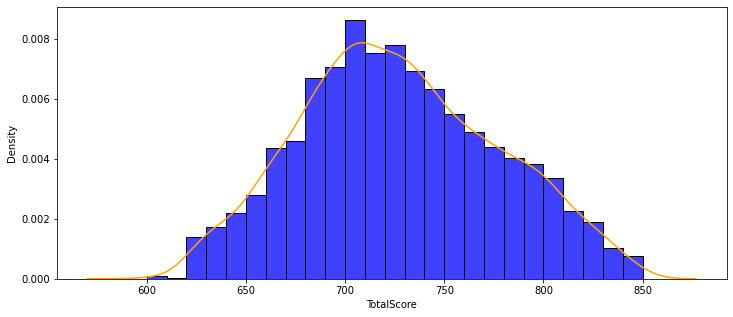

In [69]:
plt.figure(figsize=(12, 5))

sns.histplot(keyLoanRollup['TotalScore'], bins=25, binrange=(600,850), stat="density", fill=True, color ='blue')
sns.kdeplot(keyLoanRollup['TotalScore'], color="orange");


<Figure size 864x432 with 0 Axes>

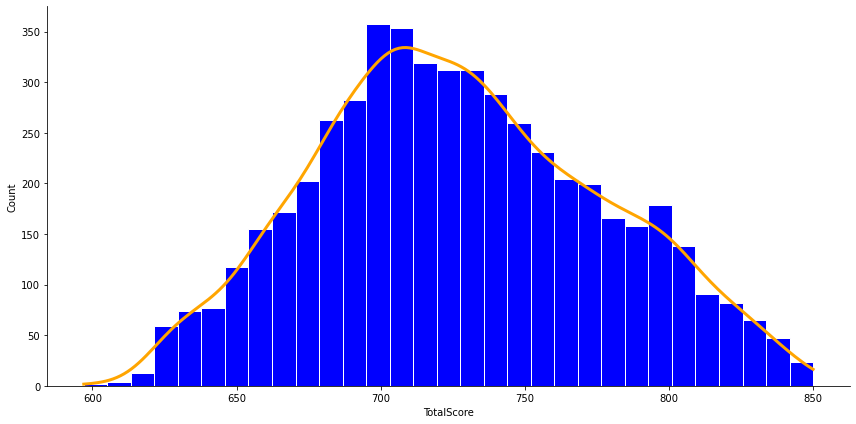

In [65]:
plt.figure(figsize=(12, 6))
sns.displot(data=keyLoanRollup, x='TotalScore', kde=True, color='orange',
            line_kws={'lw': 3}, facecolor='blue', edgecolor='white', height=6, aspect=2)


# sns.displot(data=keyLoanRollup,
#             x='TotalScore',
#             kde=True,
#             height=5, aspect=2)

In [70]:
keyLoanInfo['LastDecision'].value_counts()

Approved        6195
Counteroffer    1054
Name: LastDecision, dtype: int64

In [71]:
# take max of Total Score and Score

keyLoanRollup['FICO'] = keyLoanRollup[['Score', 'TotalScore']].max(axis=1)
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   float64       
 3   Score                         5171 non-null   float64       
 4   IntRate                       5222 non-null   float64       
 5   Term                          5222 non-null   float64       
 6   OrigDTI                       5222 non-null   float64       
 7   PotentialProductDebtToIncome  5222 non-null   float64       
 8   TotalScore                    5206 non-null   float64       
 9   AccountNumber                 5222 non-null   object        
 10  appid                         5222 non-null   int64         
 11  AsOfDate                      

In [72]:
# drop Score and TotalScore

keyLoanRollup.drop(['Score', 'TotalScore'], axis=1, inplace=True)
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   float64       
 3   IntRate                       5222 non-null   float64       
 4   Term                          5222 non-null   float64       
 5   OrigDTI                       5222 non-null   float64       
 6   PotentialProductDebtToIncome  5222 non-null   float64       
 7   AccountNumber                 5222 non-null   object        
 8   appid                         5222 non-null   int64         
 9   AsOfDate                      5222 non-null   object        
 10  FICO                          5206 non-null   float64       
dtypes: datetime64[ns](1), float64(

In [73]:
# based on the distributions, the mean is a reasoable value

fill_fico = keyLoanRollup['FICO'].mean()

keyLoanRollup['FICO'] = keyLoanInfo['TotalScore'].fillna(fill_fico)
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   float64       
 3   IntRate                       5222 non-null   float64       
 4   Term                          5222 non-null   float64       
 5   OrigDTI                       5222 non-null   float64       
 6   PotentialProductDebtToIncome  5222 non-null   float64       
 7   AccountNumber                 5222 non-null   object        
 8   appid                         5222 non-null   int64         
 9   AsOfDate                      5222 non-null   object        
 10  FICO                          5222 non-null   float64       
dtypes: datetime64[ns](1), float64(

In [74]:
# convert a bunch of values to ints

toInt = ['FICO', 'Term', 'contractAmt']

keyLoanRollup[toInt] = keyLoanRollup[toInt].astype(int)

keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   int32         
 3   IntRate                       5222 non-null   float64       
 4   Term                          5222 non-null   int32         
 5   OrigDTI                       5222 non-null   float64       
 6   PotentialProductDebtToIncome  5222 non-null   float64       
 7   AccountNumber                 5222 non-null   object        
 8   appid                         5222 non-null   int64         
 9   AsOfDate                      5222 non-null   object        
 10  FICO                          5222 non-null   int32         
dtypes: datetime64[ns](1), float64(

In [75]:
keyLoanRollup.head()

,AppEntryCompletedDate,CustomerNumber,contractAmt,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,AccountNumber,appid,AsOfDate,FICO
0,2017-08-28,1453250,13000,9.4900,60,0.3203,0.3984,3750000223,2027,2021-10-01,659
1,2017-09-02,00000458159,5000,9.4900,60,0.3274,0.3411,3750000215,2041,2021-10-01,728
2,2017-09-06,00001118347,12000,9.4900,60,0.2267,0.2727,3750000219,2046,2021-10-01,685
3,2017-09-09,00002287661,7500,9.4900,60,0.1845,0.2029,3750000233,2069,2021-10-01,734
4,2017-09-11,00001428711,4555,9.4900,36,0.3795,0.4265,3750000227,2073,2021-10-01,769


# Check the Loan Maturity relative to current date

In [76]:
today = dt.datetime.today().date()
today

datetime.date(2021, 10, 12)

In [ ]:
type(today)

In [77]:
six_months = today + relativedelta(months=+6)
six_months

datetime.date(2022, 4, 12)

In [78]:
type(keyLoanRollup['AppEntryCompletedDate'])

pandas.core.series.Series

In [79]:
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   int32         
 3   IntRate                       5222 non-null   float64       
 4   Term                          5222 non-null   int32         
 5   OrigDTI                       5222 non-null   float64       
 6   PotentialProductDebtToIncome  5222 non-null   float64       
 7   AccountNumber                 5222 non-null   object        
 8   appid                         5222 non-null   int64         
 9   AsOfDate                      5222 non-null   object        
 10  FICO                          5222 non-null   int32         
dtypes: datetime64[ns](1), float64(

In [80]:
# df.apply(lambda x: x['mydate'] + pd.DateOffset(months = x['month shift']), axis=1)
# find the maturity date by adding the term to the App Complete Date

keyLoanRollup['Maturity'] = keyLoanRollup.apply(lambda x: x['AppEntryCompletedDate'] + pd.DateOffset(months = x['Term']), axis=1)
keyLoanRollup.head()

,AppEntryCompletedDate,CustomerNumber,contractAmt,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,AccountNumber,appid,AsOfDate,FICO,Maturity
0,2017-08-28,1453250,13000,9.4900,60,0.3203,0.3984,3750000223,2027,2021-10-01,659,2022-08-28
1,2017-09-02,00000458159,5000,9.4900,60,0.3274,0.3411,3750000215,2041,2021-10-01,728,2022-09-02
2,2017-09-06,00001118347,12000,9.4900,60,0.2267,0.2727,3750000219,2046,2021-10-01,685,2022-09-06
3,2017-09-09,00002287661,7500,9.4900,60,0.1845,0.2029,3750000233,2069,2021-10-01,734,2022-09-09
4,2017-09-11,00001428711,4555,9.4900,36,0.3795,0.4265,3750000227,2073,2021-10-01,769,2020-09-11


In [81]:
# make AsOfDate a date

keyLoanRollup['AsOfDate'] = pd.to_datetime(keyLoanRollup['AppEntryCompletedDate'], format = '%Y-%m-%d')
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   int32         
 3   IntRate                       5222 non-null   float64       
 4   Term                          5222 non-null   int32         
 5   OrigDTI                       5222 non-null   float64       
 6   PotentialProductDebtToIncome  5222 non-null   float64       
 7   AccountNumber                 5222 non-null   object        
 8   appid                         5222 non-null   int64         
 9   AsOfDate                      5222 non-null   datetime64[ns]
 10  FICO                          5222 non-null   int32         
 11  Maturity                      

In [82]:
# check for any closed loans
# date + relativedelta(months=+6)
# compare maturity to current date

keyLoanRollup['DaysMature'] = (keyLoanRollup['Maturity'] - keyLoanRollup['AsOfDate']).dt.days
keyLoanRollup.head()


,AppEntryCompletedDate,CustomerNumber,contractAmt,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,AccountNumber,appid,AsOfDate,FICO,Maturity,DaysMature
0,2017-08-28,1453250,13000,9.4900,60,0.3203,0.3984,3750000223,2027,2017-08-28,659,2022-08-28,1826
1,2017-09-02,00000458159,5000,9.4900,60,0.3274,0.3411,3750000215,2041,2017-09-02,728,2022-09-02,1826
2,2017-09-06,00001118347,12000,9.4900,60,0.2267,0.2727,3750000219,2046,2017-09-06,685,2022-09-06,1826
3,2017-09-09,00002287661,7500,9.4900,60,0.1845,0.2029,3750000233,2069,2017-09-09,734,2022-09-09,1826
4,2017-09-11,00001428711,4555,9.4900,36,0.3795,0.4265,3750000227,2073,2017-09-11,769,2020-09-11,1096


In [83]:
# check to see if there are any negative (loans maturity)

mature = keyLoanRollup[keyLoanRollup['DaysMature'] < -30]
mature.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         0 non-null      datetime64[ns]
 1   CustomerNumber                0 non-null      object        
 2   contractAmt                   0 non-null      int32         
 3   IntRate                       0 non-null      float64       
 4   Term                          0 non-null      int32         
 5   OrigDTI                       0 non-null      float64       
 6   PotentialProductDebtToIncome  0 non-null      float64       
 7   AccountNumber                 0 non-null      object        
 8   appid                         0 non-null      int64         
 9   AsOfDate                      0 non-null      datetime64[ns]
 10  FICO                          0 non-null      int32         
 11  Maturity                      0 non-null    

In [84]:
keyLoanRollup['DaysMature'].describe()

count   5222.0000
mean    1450.0023
std      462.2301
min      365.0000
25%     1096.0000
50%     1826.0000
75%     1826.0000
max     1827.0000
Name: DaysMature, dtype: float64

In [85]:
# sort by cis and check for dupes

keyLoanRollup = keyLoanRollup.sort_values(['appid', 'CustomerNumber'],ascending=[True, True])

keyLoanRollup.head(20)

,AppEntryCompletedDate,CustomerNumber,contractAmt,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,AccountNumber,appid,AsOfDate,FICO,Maturity,DaysMature
0,2017-08-28,1453250,13000,9.4900,60,0.3203,0.3984,3750000223,2027,2017-08-28,659,2022-08-28,1826
1,2017-09-02,00000458159,5000,9.4900,60,0.3274,0.3411,3750000215,2041,2017-09-02,728,2022-09-02,1826
2,2017-09-06,00001118347,12000,9.4900,60,0.2267,0.2727,3750000219,2046,2017-09-06,685,2022-09-06,1826
3,2017-09-09,00002287661,7500,9.4900,60,0.1845,0.2029,3750000233,2069,2017-09-09,734,2022-09-09,1826
4,2017-09-11,00001428711,4555,9.4900,36,0.3795,0.4265,3750000227,2073,2017-09-11,769,2020-09-11,1096
5,2017-09-12,00001175785,10000,9.4900,36,0.2917,0.3988,3750000226,2075,2017-09-12,734,2020-09-12,1096
6,2017-09-21,00000312930,6000,8.9900,48,0.2889,0.3089,3750000229,6014,2017-09-21,769,2021-09-21,1461
7,2017-09-25,00000556098,10000,9.4900,48,0.3437,0.3984,3750000243,6035,2017-09-25,701,2021-09-25,1461
8,2017-10-03,00001552440,7500,9.9900,60,0.1228,0.1786,3750000323,6101,2017-10-03,760,2022-10-03,1826
9,2017-10-10,00000285666,5000,9.4900,60,0.3714,0.3957,3750000272,6134,2017-10-10,722,2022-10-10,1826


In [86]:
len(keyLoanRollup['CustomerNumber'].unique())

4861

In [87]:
keyLoanRollup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5221
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         5222 non-null   datetime64[ns]
 1   CustomerNumber                5222 non-null   object        
 2   contractAmt                   5222 non-null   int32         
 3   IntRate                       5222 non-null   float64       
 4   Term                          5222 non-null   int32         
 5   OrigDTI                       5222 non-null   float64       
 6   PotentialProductDebtToIncome  5222 non-null   float64       
 7   AccountNumber                 5222 non-null   object        
 8   appid                         5222 non-null   int64         
 9   AsOfDate                      5222 non-null   datetime64[ns]
 10  FICO                          5222 non-null   int32         
 11  Maturity                      

In [89]:
# sort by cis and check for dupes
keyLoanRollup = keyLoanRollup.sort_values(['appid', 'CustomerNumber'],ascending=[True, True])
keyLoanRollup['Dupe'] = keyLoanRollup['appid'].eq(keyLoanRollup['appid'].shift())
keyLoanRollup.head()

,AppEntryCompletedDate,CustomerNumber,contractAmt,IntRate,Term,OrigDTI,PotentialProductDebtToIncome,AccountNumber,appid,AsOfDate,FICO,Maturity,DaysMature,Dupe
0,2017-08-28,1453250,13000,9.4900,60,0.3203,0.3984,3750000223,2027,2017-08-28,659,2022-08-28,1826,False
1,2017-09-02,00000458159,5000,9.4900,60,0.3274,0.3411,3750000215,2041,2017-09-02,728,2022-09-02,1826,False
2,2017-09-06,00001118347,12000,9.4900,60,0.2267,0.2727,3750000219,2046,2017-09-06,685,2022-09-06,1826,False
3,2017-09-09,00002287661,7500,9.4900,60,0.1845,0.2029,3750000233,2069,2017-09-09,734,2022-09-09,1826,False
4,2017-09-11,00001428711,4555,9.4900,36,0.3795,0.4265,3750000227,2073,2017-09-11,769,2020-09-11,1096,False


In [90]:
dupes = keyLoanRollup[keyLoanRollup['Dupe'] == True]
dupes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AppEntryCompletedDate         0 non-null      datetime64[ns]
 1   CustomerNumber                0 non-null      object        
 2   contractAmt                   0 non-null      int32         
 3   IntRate                       0 non-null      float64       
 4   Term                          0 non-null      int32         
 5   OrigDTI                       0 non-null      float64       
 6   PotentialProductDebtToIncome  0 non-null      float64       
 7   AccountNumber                 0 non-null      object        
 8   appid                         0 non-null      int64         
 9   AsOfDate                      0 non-null      datetime64[ns]
 10  FICO                          0 non-null      int32         
 11  Maturity                      0 non-null    

In [91]:
print(f"Unique Custs: {len(keyLoanRollup['CustomerNumber'].unique())}")
print(f"Unique Apps: {len(keyLoanRollup['appid'].unique())}")

Unique Custs: 4861
Unique Apps: 5222


In [93]:
# output keyloanInfo

keyLoanRollup.to_csv('keyPLoanInfo2021.csv', index=False)

In [102]:
# make file for portfolio

PLoanPort2021 = keyLoanRollup[['appid', 'CustomerNumber', 'AccountNumber', 'contractAmt', 'Term', 'IntRate']]

In [103]:
newcolumns = ['AppId', 'CustomerNumber', 'ContractNum', 'contractAmt', 'Term', 'Interest Rate']

In [104]:
PLoanPort2021.columns = newcolumns
PLoanPort2021.head()

,AppId,CustomerNumber,ContractNum,contractAmt,Term,Interest Rate
0,2027,1453250,3750000223,13000,60,9.4900
1,2041,00000458159,3750000215,5000,60,9.4900
2,2046,00001118347,3750000219,12000,60,9.4900
3,2069,00002287661,3750000233,7500,60,9.4900
4,2073,00001428711,3750000227,4555,36,9.4900


In [105]:
PLoanPort2021.shape

(5222, 6)

In [106]:
len(PLoanPort2021['AppId'].unique())

5222

In [107]:
PLoanPort2021.to_csv('PLoanPort2021.csv', index=False)

In [108]:
os.getcwd()

'C:\\Users\\bbutler\\BButlerStuff\\PLoan\\PortSep2021'